# Start


In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from skimage import  io
from skimage.color import rgb2gray
from skimage.transform import  resize
from utils import *
from haar_like_features import * 
from sklearn.metrics import roc_auc_score, accuracy_score
from skimage.feature import draw_haar_like_feature
from skimage.util import img_as_int
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
utils = Utils()
haar = HaarLikeFeatures()

In [3]:
features_values = utils.load_pickle('../dataset/features_values.pkl')
features_selected_index = utils.load_pickle('../dataset/feat_index_lg_percentile.pkl')
features_selected_values = utils.load_pickle('../dataset/features_values_selected.pkl')

features_values = np.array(features_values)
features_selected_values = np.array(features_selected_values)
features_selected_index = np.array(features_selected_index, dtype=int)

In [4]:
X_train, y_train = utils.load_pickle('../dataset/train_lg_percentile.pkl')
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_train shape:  (30626, 607)
y_train shape:  (30626,)


In [5]:
X_val, y_val = utils.load_pickle('../dataset/test_dataset.pkl')
X_val, y_val = X_val[:, features_selected_index], y_val
print('X_val shape: ', X_val.shape)
print('y_val shape: ', y_val.shape)

X_val shape:  (24045, 607)
y_val shape:  (24045,)


In [6]:
X_test, y_test = utils.load_pickle('../dataset/val_dataset.pkl')
X_test = X_test[:, features_selected_index]
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_test shape:  (698, 607)
y_test shape:  (698,)


In [7]:
print("training set: ", X_train.shape)
print("validation set: ", X_val.shape)
print("testing set: ", X_test.shape)
X_train = np.concatenate((X_train, X_test))
y_train = np.concatenate((y_train, y_test))
print("======================================")
print("training set: ", X_train.shape)
print("validation set: ", X_val.shape)

training set:  (30626, 607)
validation set:  (24045, 607)
testing set:  (698, 607)
training set:  (31324, 607)
validation set:  (24045, 607)


In [8]:
X_train = (X_train / (19*19))
X_val = (X_val / (19*19))

In [7]:
clf = AdaBoostClassifier(n_estimators=10,)
clf.fit(X, y)

NameError: name 'X' is not defined

In [ ]:
is_face_prob = clf.predict_proba(X_val)[:,1]
(is_face_prob > 0.5).astype(int)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,

In [ ]:
y_pred = clf.predict(X_val)
mat = confusion_matrix(y_val, y_pred)
false_positive_rate = mat[0][1] / (mat[0][1] + mat[0][0])
detection_rate = mat[1][1] / (mat[1][1] + mat[1][0])

In [52]:
print('False Positive Rate: ', false_positive_rate)
print('Detection Rate: ', detection_rate)
print('Accuracy: ', (mat[0][0] + mat[1][1]) / (mat[0][0] + mat[1][1] + mat[0][1] + mat[1][0]))
print('')

False Positive Rate:  0.07692307692307693
Detection Rate:  0.7983539094650206
Accuracy:  0.8796561604584527



In [53]:
clf.estimator_weights_

array([2.65539018, 1.280639  , 1.10231723, 0.97271939, 0.896459  ])

In [60]:
for i in clf.estimators_:
    print(i.predict(X_val, y_val))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [55]:
clf.feature_importances_[clf.feature_importances_ > 0]

array([0.38441993, 0.14082025, 0.15958209, 0.12978006, 0.18539767])

In [18]:
X, y = X_train.copy(), y_train.copy()


P:  (2658, 6066)
N:  (27666, 6066)


In [7]:
def pred_the(clf, X , the = 0.5):
    is_face_prob = clf.predict_proba(X)[:,1]
    y_pred = (is_face_prob > the).astype(int)
    return y_pred

def _eval(clf, X, y, the = 0.5):
    y_pred = pred_the(clf, X, the)

    mat = confusion_matrix(y, y_pred)
    false_positive_rate = mat[0][1] / (mat[0][1] + mat[0][0])
    detection_rate = mat[1][1] / (mat[1][1] + mat[1][0])

    print('False Positive Rate: ', false_positive_rate)
    print('Detection Rate: ', detection_rate)
    print('Accuracy: ', (mat[0][0] + mat[1][1]) / (mat[0][0] + mat[1][1] + mat[0][1] + mat[1][0]))
    print('=====')
    return false_positive_rate, detection_rate

def train_v1(X, y, X_val, y_val, d, f, F):
    n = []
    th = []
    classifiers = []
    P = X[y == 1]
    N = X[y == 0]
    d = 0.4
    f = 0.6
    F = 0.01
    d0 = 1
    d1 = 1
    f0 = 1
    f1 = 1
    print('P: ', P.shape)
    print('N: ', N.shape)
    while f1 > F:
        n += 1
        print("n: ", n)
        clf = AdaBoostClassifier(n_estimators=n)
        clf.fit(X, y)
        f1, d1 = _eval(clf, X_val, y_val)
        while d1 < d0 * d:
            print("\tth: ", d1)
            the -= 0.05
            f1, d1 = _eval(clf, X_val, y_val, the)
    return clf, the
    i = 0
    while f1 > F and len(N) > 0:
        i+=1
        print(f"============== Start {i} ================")
        n = 0
        d0 = d1
        f0 = f1
        the = 1
        while f1 > f * f0:
            n += 1
            print("n: ", n)
            clf = AdaBoostClassifier(n_estimators=n)
            clf.fit(X, y)
            f1, d1 = _eval(clf, X_val, y_val)
            while d1 < d0 * d:
                print("\tth: ", d1)
                the -= 0.05
                f1, d1 = _eval(clf, X_val, y_val, the)
        print("======================================")
        print(f"================={i}====================")
        print("======================================")
        th.append(the)
        classifiers.append(clf)
        utils.save_pickle(clf, './models/adaboost2/adaboost_' + str(i) + '.pkl')
        
        if len(N) == 0:
            break
        if f1 > F:
            print(N.shape)
            y_pred = pred_the(clf, N, the)
            N = N[y_pred == 1]
            print("N shape: ", N.shape)
            X = np.concatenate((P, N))
            y = np.concatenate((np.ones(P.shape[0]), np.zeros(N.shape[0])))

In [16]:
def train_v2(X, y, layers):
    faces, non_faces = X[y == 1], X[y == 0]
    clfs = []
    for i in layers:
        if non_faces.shape[0] == 0:
            print("===== Training Done =====")
            break
        training = np.concatenate((faces, non_faces))
        training_labels = np.concatenate((np.ones(faces.shape[0]), np.zeros(non_faces.shape[0])))
        print("==== start training ====")
        clf = AdaBoostClassifier(n_estimators=i)
        clf.fit(training, training_labels)
        print("=== finish training ===")
        predictions = clf.predict(training)
        non_faces = training[(training_labels == 0) & (predictions == 1)]
        print("training accuracy: ", accuracy_score(predictions, training_labels))
        evaluation = clf.predict(X_val)
        print("validation accuracy: ", accuracy_score(evaluation, y_val))
        print("false pos: ", non_faces.shape)
        clfs.append(clf)
    return clfs

In [17]:
clfs = train_v2(X_train, y_train, [100, 200, 300])

==== start training ====


In [101]:
utils.save_pickle(clfs, '../models/adaboost2/adaboost_clfs1.pkl')

In [102]:
choosen_features = []
for i in classifiers:
    choosen_features.append(i.feature_importances_)

In [38]:
[np.where(np.array(i) > 0) for i in choosen_features]

[(array([930], dtype=int64),),
 (array([1167, 1568, 1949], dtype=int64),),
 (array([  24,  100, 1475, 1568, 1614, 1827, 1921, 1959, 5503, 5680],
        dtype=int64),),
 (array([   0,   42,   58,   73,  142,  143,  227,  254,  423,  434,  509,
          930, 1161, 1242, 1250, 1332, 1487, 1499, 1639, 1640, 1642, 1649,
         1663, 1667, 1740, 1850, 1853, 1999, 2099, 2224, 2237, 2331, 2410,
         3962, 5104, 5171, 5250, 5344, 5395, 5487, 5493, 5505, 5506, 5574,
         5667, 5892, 6006, 6049], dtype=int64),),
 (array([], dtype=int64),)]

In [14]:
from PIL import Image

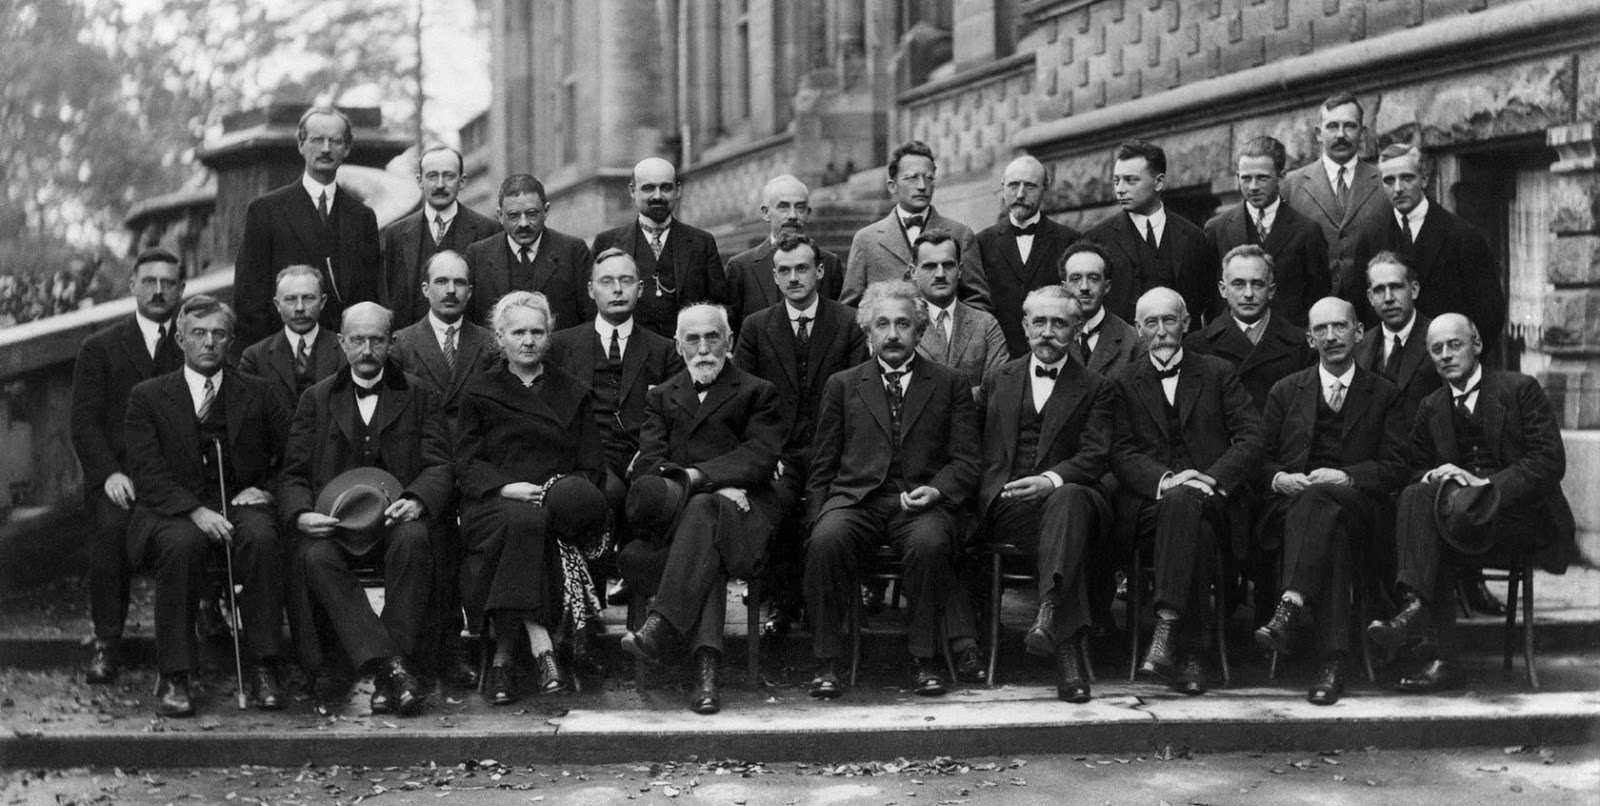

In [47]:
img = Image.open('../Images/solvay-conference.jpg')
img = img.convert("L")
img

In [53]:
imgP = Image.open('../Images/solvay-conference.jpg')
imgP.thumbnail((384, 288),)

In [54]:
imgColored = Image.open('../Images/solvay-conference.jpg')
imgColored.thumbnail((384, 288),)
imgColored = np.array(imgColored)

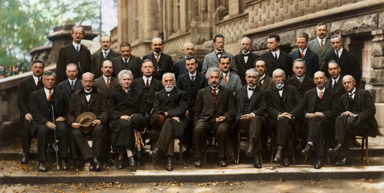

In [55]:
imgP

## getting features map


In [11]:
haar = HaarLikeFeatures()
utils = Utils()
features_values = haar.extract_features_as_labels(0, 0, 19, 19)
classifiers = []
classifiers.append(utils.load_pickle('../models/adaboost1/adaboost_1.pkl'))
classifiers.append(utils.load_pickle('../models/adaboost1/adaboost_10.pkl'))
classifiers.append(utils.load_pickle('../models/adaboost1/adaboost_3.pkl'))
classifiers.append(utils.load_pickle('../models/adaboost1/'))
classifiers

[AdaBoostClassifier(n_estimators=1),
 AdaBoostClassifier(n_estimators=3),
 AdaBoostClassifier(n_estimators=10)]

In [12]:
selected_features_labels = [i.feature_importances_ for i in classifiers]
selected_features_labels = [np.where(np.array(i) > 0) for i in selected_features_labels]
selected_features_labels

[(array([930], dtype=int64),),
 (array([1167, 1568, 1949], dtype=int64),),
 (array([  24,  100, 1475, 1568, 1614, 1827, 1921, 1959, 5503, 5680],
        dtype=int64),)]

In [13]:
selected_features = [features_values[i] for i in selected_features_labels]
selected_features

[array([[ 0.,  3., 14.,  8.,  4.]]),
 array([[ 0.,  7.,  2., 10.,  5.],
        [ 1.,  5.,  8.,  1.,  2.],
        [ 1.,  8.,  9.,  2.,  4.]]),
 array([[ 0.,  1.,  5.,  2.,  1.],
        [ 0.,  5.,  5.,  2.,  1.],
        [ 1.,  0.,  5.,  1.,  2.],
        [ 1.,  5.,  8.,  1.,  2.],
        [ 1.,  8.,  0.,  1.,  2.],
        [ 1.,  0., 15.,  2.,  4.],
        [ 1.,  6., 13.,  2.,  4.],
        [ 1.,  9.,  3.,  2.,  4.],
        [ 4., 15., 13.,  4.,  4.],
        [ 4., 12.,  6.,  6.,  6.]])]

In [106]:
from PIL import Image

In [156]:
window_size = 19


haar = HaarLikeFeatures()
def is_face(img, layer_idx):
    feat = haar.get_feautures_result(img, selected_features[layer_idx])
    feat = feat / 19*19
    feat_in = np.zeros(( 6066))
    feat_in[selected_features_labels[layer_idx]] = feat
    pred = classifiers[layer_idx].predict(feat_in.reshape(1, -1))
    return pred[0]


In [186]:
def test_image(imgP):
    img_arr = np.array(imgP)
    img_arr = rgb2gray(img_arr)
    img = np.array(imgP)
    window_size = 20
    for k in range(24, 100, 1):
        for i in range(0, img_arr.shape[0] - k - 1, 10):
            for j in range(0, img_arr.shape[1] - k - 1, 10):
                img_in = img_arr[i:i+k, j:j+k]
                img_in = resize(img_in, (window_size, window_size))
                integral_image = utils.get_integral_image(img_in).astype(int)
                is_facee = True
                for ci in range(1, len(classifiers)):
                    if not is_face(integral_image, ci):
                        is_facee = False
                        break
                if is_facee:
                    img[i:i+k, j] = [255, 0, 0]
                    img[i:i+k, j+k] = [255, 0, 0]
                    img[i, j:j+k] = [255, 0, 0]
                    img[i+k, j:j+k] = [255, 0, 0]
                    print("face")
                            
    return img
                    

In [187]:
output_img = test_image(imgP)

face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face
face


KeyboardInterrupt: 

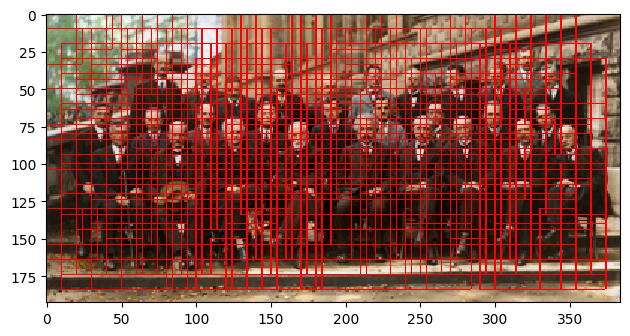

In [ ]:
io.imshow(output_img)
io.show()

In [ ]:
imgP = Image.open('./Images/messi.jpeg')
imgP = imgP.resize((imgP.size[0] // 4, imgP.size[1] // 4))

FileNotFoundError: [Errno 2] No such file or directory: './Images/messi.jpeg'

In [31]:
imgP.size

(270, 360)

In [32]:
a = test_image(imgP)

=========== start checking:  0 0 19
=========== start checking:  0 10 19
=========== start checking:  0 20 19
=========== start checking:  0 30 19
=========== start checking:  0 40 19
=========== start checking:  0 50 19
=========== start checking:  0 60 19
=========== start checking:  0 70 19
=========== start checking:  0 80 19
=========== start checking:  0 90 19
=========== start checking:  0 100 19
=========== start checking:  0 110 19
=========== start checking:  0 120 19
=========== start checking:  0 130 19
=========== start checking:  0 140 19
=========== start checking:  0 150 19
=========== start checking:  0 160 19
=========== start checking:  0 170 19
=========== start checking:  0 180 19
=========== start checking:  0 190 19
=========== start checking:  0 200 19
=========== start checking:  0 210 19
=========== start checking:  0 220 19
=========== start checking:  0 230 19
=========== start checking:  0 240 19
=========== start checking:  0 250 19
=========== start check

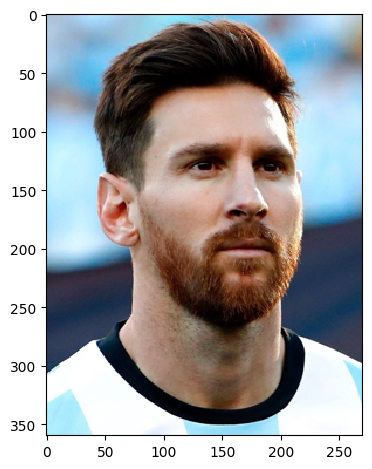

In [33]:
io.imshow(a)
io.show()